# Example: Open mHealth Blood Pressure Visualization

We generate random Open mHealth blood pressure readings, and visualize them with matplotlib.

In [1]:
%pip install -q pandas matplotlib requests

Note: you may need to restart the kernel to use updated packages.


In [2]:
import random
from datetime import datetime, timedelta

import pandas as pd
import matplotlib.pyplot as plt

In [3]:
def generate_blood_pressure_readings(num_readings):
    '''
    Generate random Open mHealth blood pressure readings.
    https://www.openmhealth.org/documentation/#/schema-docs/schema-library/schemas/omh_blood-pressure
    '''
    readings = []
    start_time = datetime(2020, 1, 1, 0, 0, 0)
    
    for _ in range(num_readings):
        # Generate random systolic and diastolic blood pressure values
        systolic = random.randint(100, 160)  # Assuming normal range for systolic pressure
        diastolic = random.randint(60, 100)  # Assuming normal range for diastolic pressure
        
        # Generate random measurement location, body posture, and temporal relationship to physical activity
        body_posture = random.choice(["sitting", "standing"])
        measurement_location = random.choice(["left wrist", "right wrist"])
        temporal_relationship_to_physical_activity = random.choice(["at rest", "during exercise"])

        # Generate a random effective time frame
        time_frame = start_time + timedelta(minutes=random.randint(1, 60*24*365))

        # Append the reading to the list
        readings.append({
            "systolic_blood_pressure": {"value": systolic, "unit": "mmHg"},
            "diastolic_blood_pressure": {"value": diastolic, "unit": "mmHg"},
            "body_posture": body_posture,
            "measurement_location": measurement_location,
            "temporal_relationship_to_physical_activity": temporal_relationship_to_physical_activity,
            "effective_time_frame": { "date_time": time_frame.strftime("%Y-%m-%dT%H:%M:%SZ") }
        })
        
    return readings

In [4]:
def plot_readings_over_time(readings):
    '''
    Plot Open mHealth blood pressure readings.
    '''
    # Create a DataFrame from the readings
    df = pd.DataFrame(readings)

    # Convert effective_time_frame to datetime format
    df['effective_time_frame'] = pd.to_datetime(df['effective_time_frame'].apply(lambda x: x['date_time']))

    # Sort DataFrame by effective_time_frame
    df = df.sort_values(by='effective_time_frame')

    # Plot systolic and diastolic blood pressure over time
    plt.figure(figsize=(10, 6))
    plt.plot(df['effective_time_frame'], df['systolic_blood_pressure'].apply(lambda x: x['value']), 
             label='Systolic BP', color='purple', marker='o', markersize=4, linewidth=0.2)
    plt.plot(df['effective_time_frame'], df['diastolic_blood_pressure'].apply(lambda x: x['value']), 
             label='Diastolic BP', color='green', marker='o', markersize=4, linewidth=0.2)

    plt.xlabel('Time')
    plt.ylabel('Blood Pressure (mmHg)')
    plt.title('Systolic and Diastolic Blood Pressure Over Time')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [5]:
# Generate synthetic blood pressure readings
num_readings = 500
readings = generate_blood_pressure_readings(num_readings)

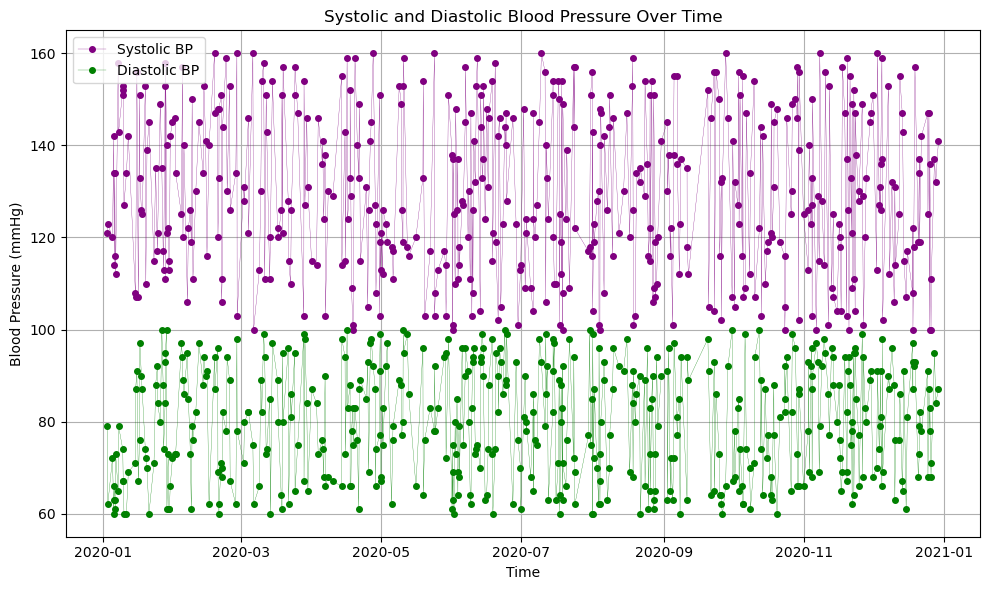

In [6]:
plot_readings_over_time(readings)

## Data from Open mHealth web-visualizations

A javascript visualization at https://jsfiddle.net/jasperspeicher/dremvboo/ (via https://github.com/openmhealth/web-visualizations) contains some example data. Let's render that data too.

In [7]:
jasper_speicher_data_url = 'https://gist.githubusercontent.com/jasperSpeicher/3a6af8226182880d75d2/raw/1yr.json'

In [8]:
import requests

In [9]:
r = requests.get(jasper_speicher_data_url)
jasper_speicher_data = r.json()

In [10]:
filtered_data = [item['body'] for item in jasper_speicher_data 
                 if 'body' in item 
                 and 'effective_time_frame' in item['body'] 
                 and 'systolic_blood_pressure' in item['body'] 
                 and 'diastolic_blood_pressure' in item['body']]


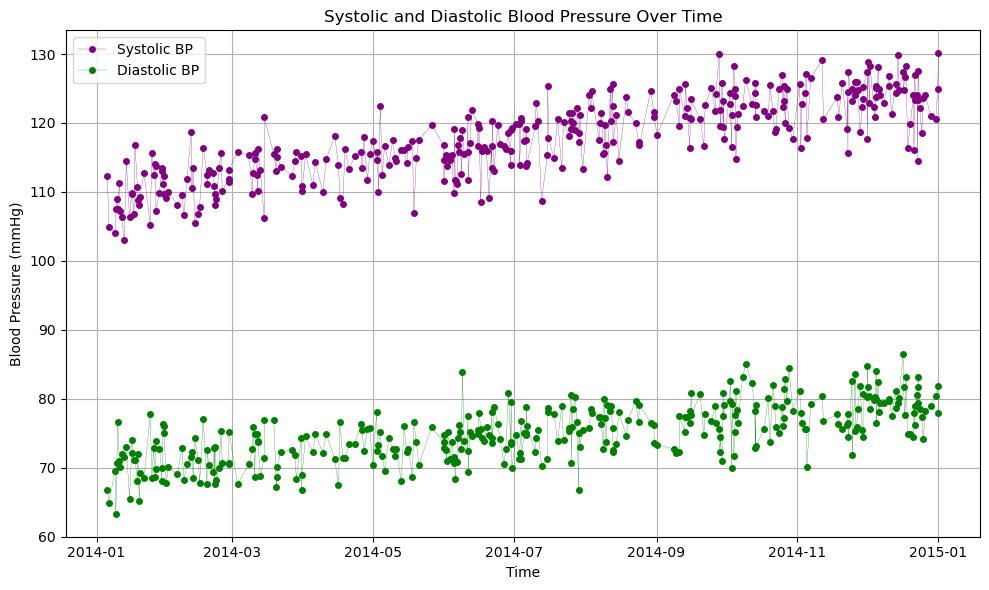

In [11]:
plot_readings_over_time(filtered_data)